In [9]:
import numpy as np
import matplotlib.pyplot as plt
from utils.utils import generate_dataset
from utils.activation_functions import Sigmoid, Identity, ReLU
from utils.cost_functions import MSE
from utils.neural_network import NeuralNetwork
from utils.training import GradientDescent, StochasticGradientDescent
from utils.step_methods import RMSpropStep

In [10]:
np.random.seed(123)
x, y = generate_dataset(400)

In [ ]:
network_input_size = 1
network_output_size = 1

layer_output_sizes = [10, 10, network_output_size]
activation_funcs = [Sigmoid(), Sigmoid(), Identity()]

net = NeuralNetwork(
    network_input_size,
    layer_output_sizes,
    activation_funcs,
    MSE(),
)


input_samples = x.shape[0]

# Animation
iterations = 1500
n_frames = 500
iterations_per_frame = iterations // n_frames

predictions = np.zeros((n_frames+1, input_samples))
mse_vals = np.zeros((n_frames+1, 2)) # (n_iter, )


# Untrained
predictions[0] = net.predict(x).ravel()
mse_vals[0] = (0, net.cost_batch(x, y))

# Train
for i in range(n_frames):
    net.train(
        StochasticGradientDescent(
            step_method = RMSpropStep(learning_rate=0.005, decay_rate=0.9),
            inputs = x,
            targets = y
        ),
        num_iterations = iterations_per_frame
    )

    predictions[i+1] = net.predict(x).ravel()
    mse_vals[i+1] = (i*iterations_per_frame, net.cost_batch(x, y))

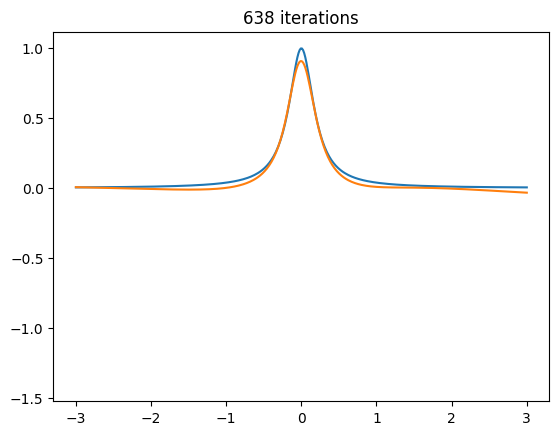

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

from utils.utils import runge

sort_idx = np.argsort(x.ravel())
x_sorted, predictions_sorted = x[sort_idx], predictions[:, sort_idx]

fig, ax = plt.subplots()
ax.plot(x_sorted, runge(x_sorted))
xdata, ydata = x_sorted, predictions_sorted[0]
line, = ax.plot(xdata, ydata)
plt.show()

for i in range(n_frames):
    clear_output(wait=True)
    y_data = np.random.rand(10)
    line.set_data(x_sorted, predictions_sorted[i+1]) # Update the line data
    ax.set_title(f"{(i+1)*iterations_per_frame} iterations")
    display(fig)
    



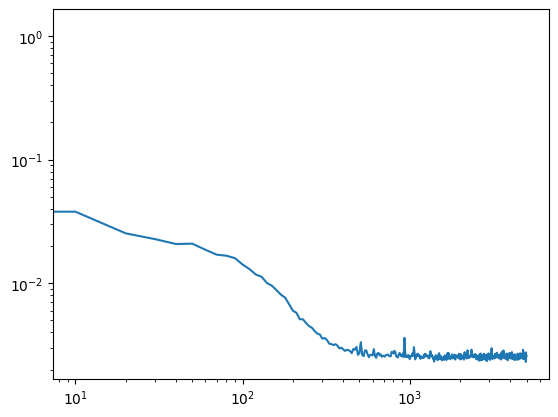

In [ ]:
# Mse vals
plt.plot(mse_vals[:,0], mse_vals[:,1], label='MSE train')
plt.loglog()
plt.show()
